In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [11]:
df = pd.read_csv("dataset\\Mall_Customers.csv")

df.drop(columns='CustomerID',inplace=True) # Delete the 'CustomerID' column from dataframe

df.rename(columns={"Genre":"Gender"}, inplace=True)  # Rename the
df.head()



,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df.describe()

df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

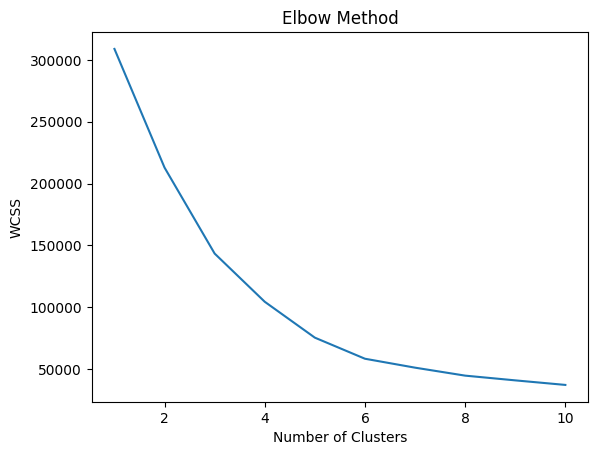

c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


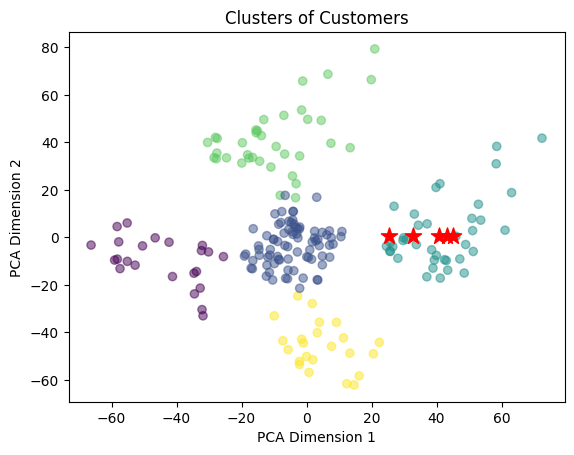

         Age    Gender  Annual Income (k$)  Spending Score (1-100)
0  45.217391  0.608696           26.304348               20.913043
1  43.088608  0.582278           55.291139               49.569620
2  32.692308  0.538462           86.538462               82.128205
3  40.666667  0.472222           87.750000               17.583333
4  25.521739  0.608696           26.304348               78.565217


In [13]:
# Step 5: Feature selection
X = df[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 6: Choosing the number of clusters
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 7: Model training
# Based on the elbow method, let's choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 8: Cluster visualization
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=150)
plt.title('Clusters of Customers')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

# Step 9: Interpretation
# Analyze the characteristics of each cluster based on centroid values
cluster_df = pd.DataFrame(centroids, columns=X.columns)
print(cluster_df)

In [14]:
# Step 3: Evaluate the model using silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4440669204743008
